Import the required modules

In [ ]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def get_tables(file1, file2):
    
  # Reads in files.
  dfs = [pd.read_csv(file1), pd.read_csv(file2)]

  # Create dummies.
  a = 0
  for i, df in enumerate(dfs):
    dfs[i] = pd.get_dummies(df)
    dfs[i] = pd.concat([dfs[i].iloc[:, :4], dfs[i].iloc[:, -5+a:], dfs[i].iloc[:, 4:8+a]], axis=1)
    a += 1

#   # Rearrange columns.
#   dfs[0] = pd.concat([dfs[0].iloc[:, :4], dfs[0].iloc[:, -5:], dfs[0].iloc[:, 4:8]], axis=1)
#   dfs[1] = pd.concat([dfs[1].iloc[:, :4], dfs[1].iloc[:, -4:], dfs[1].iloc[:, 4:9]], axis=1)

  return tuple(dfs)


In [ ]:
file = 'welding_data_by_properties.csv', 'welding_data_by_welding_types.csv'
df = get_tables(file[0], file[1])

In [ ]:
df[0].shape

In [ ]:
def explore(df, p_start_cols, p_end_cols, t_start_cols, t_end_cols, n_plots, x):
  pos = 1
  for i in range(p_start_cols, p_end_cols):
    print(f'\t{df.columns[i].capitalize()} vs Response values')
    plt.figure(figsize=[15, 5])
    for j in range(t_start_cols, t_end_cols+x):
      plt.subplot(1, n_plots, pos)
      plt.scatter(df.iloc[:, i], df.iloc[:, j])
      plt.ylabel(df.columns[j])
      plt.xlabel(df.columns[i])
      pos += 1
    plt.tight_layout()
    plt.show()
    print('\n')
    pos = 1

In [ ]:
table = ['Welding Data by Properties', 'Welding Data by Welding types']
for x in range(2):
    print(table[x])

    print('\nData Statistical Summary')
    display(df[x].describe())
    print('')

    print('\nExplore data graphically')
    explore(df[x], 0, 4, 9-x, 13-x, 4+x, x)

In [ ]:
def generate_train_test(i):
    # pass
  X = df[i].iloc[:, :9-i]#.to_numpy()
  y = df[i].iloc[:, -4:]#.to_numpy()

#   X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

  return train_test_split(X, y,random_state=1, test_size=0.2)

In [ ]:
def scale_data(X_train, X_test):
    sc_X = StandardScaler()
    X_trainscaled=sc_X.fit_transform(X_train)
    X_testscaled=sc_X.transform(X_test)

    return X_trainscaled, X_testscaled

In [ ]:
def ann_analysis():
    X_trainscaled, X_testscaled = scale_data(X_train, X_test)
    reg = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', random_state=1, max_iter=5000).fit(X_trainscaled, y_train)

    y_pred=reg.predict(X_testscaled)
    r2 = r2_score(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mae, y_pred, reg

In [ ]:
def elm_analysis(hidden_size=5000):
  input_size = X_train.shape[1]
  hidden_size = hidden_size
  input_weights = np.random.normal(size=[input_size,hidden_size])
  biases = np.random.normal(size=[hidden_size])

  def relu(x):
    return np.maximum(x, 0, x)

  def hidden_nodes(X):
      G = np.dot(X, input_weights)
      G = G + biases
      H = relu(G)
      return H

  output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

  def predict(X):
      out = hidden_nodes(X)
      out = np.dot(out, output_weights)
      return out

  y_pred = predict(X_test)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  return r2, rmse, mae, y_pred

In [ ]:
def disp_matrics(r2, rmse, mae, title):
  print(title)
  print('===============================================')
  print(f'R^2:\t{r2}')
  print(f'rmse:\t{rmse}')
  print(f'mae:\t{mae}')
  print('\n')

In [38]:
def disp_graphs(i, y_test, y_ann_pred, y_elm_pred):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(y_ann_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ANN')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.subplot(1, 2, 2)
  plt.scatter(y_elm_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ELM')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.suptitle('Comparing Models Predictive Abilities', x=.506, y=1.03, fontsize=16)
  plt.tight_layout()
  plt.show()

MODEL MATRICS.
Analysis of table 1: Welding Data by Properties
ANN modeling
C:\Users\NNAMDI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
The ANN model performance for testing set
R^2:	0.8837356454473266
rmse:	150.0590639165469
mae:	109.30604105192957


Analysis of table 2: Welding Data by Welding types
ANN modeling
The ANN model performance for testing set
R^2:	0.469605876421433
rmse:	40.02600646114289
mae:	28.64467314983191




Analysis of table 1: Welding Data by Properties
ELM modeling
The ELM model performance for testing set
R^2:	0.9536305184146584
rmse:	93.88338046071158
mae:	74.60970694853269


Analysis of table 2: Welding Data by Welding types
ELM modeling
The ELM model performance for testing set
R^2:	0.7176553559444174
rmse:	27.815872961453646
mae:	19.280528094720676




<ip

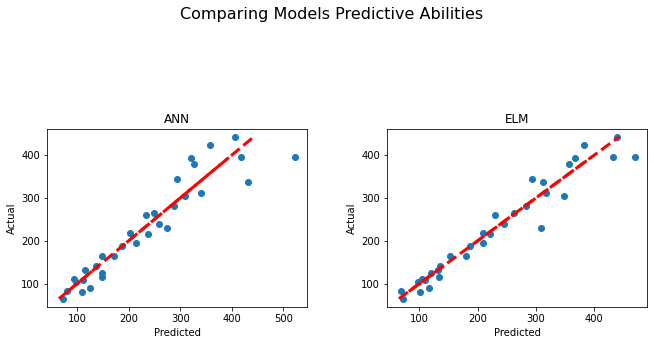

In [37]:
print('MODEL MATRICS.')
print('===============================================')

for model in ['ANN', 'ELM']:
    for i in range(2):
        print(f'Analysis of table {i+1}: {table[i]}')
        X_train, X_test, y_train, y_test = generate_train_test(i)

        if model == 'ANN':
            print('ANN modeling')
            r2, rmse, mae, y_ann_pred, reg = ann_analysis()
            disp_matrics(r2, rmse, mae, 'The ANN model performance for testing set')
            # disp_graphs(i, y_test, y_pred)
        else:
            print('ELM modeling')
            r2, rmse, mae, y_elm_pred = elm_analysis()
            disp_matrics(r2, rmse, mae, 'The ELM model performance for testing set')
            # disp_graphs(i, y_test, y_pred)
    print('\n')

disp_graphs(i, y_test, y_ann_pred, y_elm_pred)


        